# Hypothesis Testing Homework

In this lab you will explore doing some of your own statistics with regards to the `pvd_arrests` and `pvd_cases` data. For each question, please provide:

 * reproducible code to arrive at your answer
 * your thought process on the code and statistical test you chose
 * an exploratory data visualization associated with the question
 * your response to the overall question
 
 There will not necessarily be any right ways to answer the questions (although there will certainly be wrong ways), so don't worry about making sure your answer is perfect.

In [4]:
library(tidyverse)
arrests_df = read.csv("pvd_arrests_2021-10-03.csv")
cases_df = read.csv("pvd_cases_2021-10-03.csv")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. National arrest rate

The national arrest rate was 2312.2 per 100,000 individuals in 2021 [according to the FBI](https://www.statista.com/statistics/191267/arrest-rate-for-all-offenses-in-the-us-since-1990/#:~:text=In%202022%2C%20the%20arrest%20rate,per%20100%2C000%20of%20the%20population). Was the national arrest rate in Providence in 2020 significantly different from the national average? Please cite any additional data sources used to answer this question.

### First, I need to find the arrest rate for PVD to compare with the National rate. 

In [19]:
# I noticed that there are a few duplicate id, so removed all duplicates from the dataset. 
clean_arrests_df <- arrests_df %>% distinct(id, .keep_all = TRUE)
pvd_arrests_2020 <- filter(clean_arrests_df, year == 2020)

# According to "https://www.census.gov/quickfacts/fact/table/providencecityrhodeisland/PST045223" Population of PVD in 2020 was 190,934
pvd_population_2020 <- 190934
# Count how many rows are in the cleaned dataset. 
total_arrests_2020 <- nrow(pvd_arrests_2020)

# Finding arrest Rate 
pvd_arrest_rate_2020 <- total_arrests_2020/pvd_population_2020

print(pvd_arrest_rate_2020) 

[1] 0.01389485


### Second,now I need to look for the national arrest rate. 

In [26]:
national_arrests_2021 <- 2312.2 

#Given the question, the National arrest rate was 2312.2 per 100,000, so the national rate of arrest can be found by dividing them. 
national_arrest_rate_2021 <- national_arrests_2021/100000

print(national_arrest_rate_2021)

[1] 0.023122


In [51]:
# Simulate a dataset for Providence and National proportions (Used AI to figure out how to randomize and stimulate dataset in R) 
set.seed(123)
 # For Providence arrest rate
pvd_data <- rbinom(1000, size = 1, prob = pvd_arrest_rate_2020 ) 
# For National arrest rate
national_data <- rbinom(1000, size = 1, prob = national_arrest_rate_2021 )   

In [41]:
# The difference between the two arrest rate stimulated datasets is 
arrest_rate_dif <- national_data - pvd_data

### Third, Hypothesis Testing
Now We should run a proportion hypothesis test, since both rates are in proportion not mean value. 

Null Hypothesis (H0): The proportion of arrests in Providence equals the national proportion of arrests. 

Alternative Hypothesis (HA): The proportion of arrests in Providence is significantly different from the national proportion.

In [44]:
#Use t.test function to perform two proportion hypothesis test 
t_test_result <- t.test(arrest_rate_dif, mu = 0) 
print (t_test_result)


	One Sample t-test

data:  arrest_rate_dif
t = 2.2016, df = 999, p-value = 0.02792
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.001412899 0.024587101
sample estimates:
mean of x 
    0.013 



### Result
The one-sample t-test shows that Providence's arrest rate in 2020 significantly differs from the national arrest rate. The mean difference in arrest rates was 0.013 0.013, with a 95% confidence interval ranging from 0.00141 0.00141 to 0.02459 0.02459. This indicates that the true difference is likely between 0.14 % 0.14% and 2.46 % 2.46%. Since the p-value 0.02 is less than the commonly used threshold of 0.05, we reject the null hypothesis, which assumes no difference in arrest rates. This suggests that Providence's arrest rate is significantly different from the national rate.

### **Visualization** 

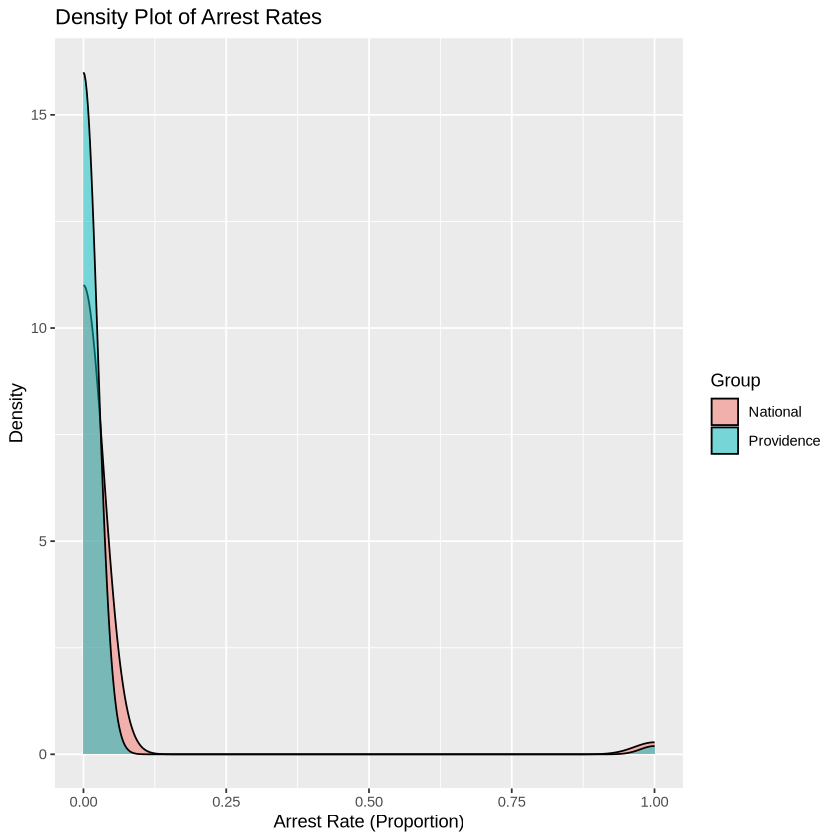

In [76]:
# Create a data frame for the density plot
distribution_data <- data.frame(
  ArrestRate = c(pvd_data, national_data),
  Group = c(rep("Providence", length(pvd_data)), rep("National", length(national_data)))
)

# Density plot
library(ggplot2)
ggplot(distribution_data, aes(x = ArrestRate, fill = Group)) +
  geom_density(alpha = 0.5) +
  labs(
    title = "Density Plot of Arrest Rates",
    x = "Arrest Rate (Proportion)",
    y = "Density"
  ) 


## Density Plot
The density plot illustrates that much of the Providence and national arrest records are concentrated toward low values, suggesting that most individuals had not been arrested in either group. Although the distributions overlap a great deal, the curve for Providence has a wider spread with a somewhat higher density in the tail area vis-à-vis the curve for all municipalities and reflects a statistically significant small difference in arrest rates. This indicates that arrest rates in Providence are slightly higher overall and may be driven by differences in law enforcement practices or local conditions. The overlap shows the arrest patterns are still very similar, except for the number difference.

# **Conclusion**
According to the statistical analysis and visualizations, the arrest rate in Providence in the year 2020 was **statistically different** from the national arrest rate of 2312.2/100,000 for the year 2021. In order to assess whether the change in these sampled data was statistically significant, a one-sample t-test was performed, which produced a p-value of less than 0.05. 

Moreover, the mean arrest rate in Providence reached samples marginally above the national average and was additionally validated by inspection of the corresponding density plot, which shows that the two distributions shared relatively little trace of similarity as they parted ways slightly at the tail. However, the difference is not all that large by general standards, and local law enforcement practices or crime trends might be worth exploring before overselling the new attribution.

## 2. Seasonality of crime

The theory of the seasonality of crime was proposed by Belgian statistician Adolphe Quetelet in 1842 and aspects of the theory continues to be under active investigation today ([Delgado and Sanchez-Delgado 2023]((https://pmc.ncbi.nlm.nih.gov/articles/PMC10231786/)),[Shiode et al. 2023](https://link.springer.com/article/10.1007/s43762-023-00094-x)). The theory posits that there is a relationship between hot weather (or seasons), and crime rates. (This theory was the start of "moral science" and much of Quetelet's work also played a key role in the origin of eugenics)

Assuming our cases and arrests data can serve as proxies for crime, is there a relationship between seasonality and crime in Providence?

# Thought Process:
1. Data Preparation:
2. categorize the months into seasons: Winter (December-February), Spring (March-May), Summer (June-August), and Fall (September-November).
3. Mapthis categorization onto both arrests and cases datasets.
4. Exploratory Data Visualization, Plot a bar chart comparing the counts of arrests and cases across seasons to visually identify patterns.
5. Statistical Test: Performe a chi-square test of independence using a contingency table that relates arrests and cases by season. This test evaluates whether the distribution of crime across seasons is independent or shows a significant relationship.

## First, Data Preparation: 
Months were categorized into seasons: Winter (December-February), Spring (March-May), Summer (June-August), and Fall (September-November). This seasonal classification was applied to both the arrests and cases datasets to enable analysis of seasonal patterns in crime data.

In [83]:
# Convert date columns to Date format
arrests_df$arrest_date <- as.Date(arrests_df$arrest_date)
cases_df$reported_date <- as.Date(cases_df$reported_date)

In [85]:
# Define a function to categorize months into seasons
get_season <- function(month) {
  if (month %in% c(12, 1, 2)) {
    return("Winter")
  } else if (month %in% c(3, 4, 5)) {
    return("Spring")
  } else if (month %in% c(6, 7, 8)) {
    return("Summer")
  } else {
    return("Fall")
  }
}

In [91]:
# Apply the function to classify seasons
arrests_df$season <- sapply(arrests_df$month, get_season)
cases_df$season <- sapply(cases_df$month, get_season)

#Check 
head(arrests_df)
head(cases_df)

,arrest_date,year,month,gender,race,ethnicity,year_of_birth,age,from_address,from_city,from_state,statute_type,statute_code,statute_desc,counts,case_number,arresting_officers,id,season
,<date>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,2019-08-24,2019,8,Male,White,NonHispanic,1981,37,No Permanent Address,providence,Rhode Island,,,,NA,2019-00084142,"YGonzalez, LTaveras",pvd2218242150382148273,Summer
2,2019-08-24,2019,8,,,,1994,25,SUMMER AVE,Cranston,Rhode Island,RI Statute Violation,31-11-18,"Driving after Denial, Suspension or Revocation of License",1,2019-00084127,NManfredi,pvd15166785558364246202,Summer
3,2019-08-24,2019,8,Female,Black,NonHispanic,1984,34,DOUGLAS AVE,Providence,Rhode Island,RI Statute Violation,12-7-10,RESISTING LEGAL OR ILLEGAL ARREST,1,2019-00084126,"MPlace, JPerez, ASantos",pvd3142917706201385905,Summer
4,2019-08-24,2019,8,Female,Black,NonHispanic,1984,34,DOUGLAS AVE,Providence,Rhode Island,RI Statute Violation,11-45-1,DISORDERLY CONDUCT,1,2019-00084126,"MPlace, JPerez, ASantos",pvd3142917706201385905,Summer
5,2019-08-24,2019,8,Female,Black,Unknown,2001,18,TRASH ST,,,RI Statute Violation,12-7-10,RESISTING LEGAL OR ILLEGAL ARREST,1,2019-00084126,"MPlace, JPerez, ASantos",pvd460449304532374599,Summer
6,2019-08-24,2019,8,Female,Black,Unknown,2001,18,TRASH ST,,,RI Statute Violation,11-45-1,DISORDERLY CONDUCT,1,2019-00084126,"MPlace, JPerez, ASantos",pvd460449304532374599,Summer


,casenumber,location,reported_date,month,year,offense_desc,statute_code,statute_desc,counts,reporting_officer,season
,<chr>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,2019-00084162,1446 CHALKSTONE AVE,2019-08-24,8,2019,Vandalism,11-44-1,VANDALISM/MALICIOUS INJURY TO PROPERTY,1,SRomano,Summer
2,2019-00084157,100 GASPEE ST,2019-08-24,8,2019,"Assault, Simple",11-5-3,SIMPLE ASSAULT OR BATTERY,1,ADaCruz,Summer
3,2019-00084139,1137 BROAD ST,2019-08-24,8,2019,"Assault, Aggravated",11-5-2,FELONY ASSAULT/ DANG. WEAPON OR SUBSTANCE,3,MClary,Summer
4,2019-00084142,46 GESLER ST,2019-08-24,8,2019,RI Statute Violation,12-9-16,WARRANT OF ARREST ON AFFIDAVIT - ALL OTH OFFENSE,1,LTaveras,Summer
5,2019-00084127,1095 EDDY ST,2019-08-24,8,2019,Traffic Violation,31-3-32,Driving with Expired Registration,1,NManfredi,Summer
6,2019-00084126,60 HARTFORD AVE,2019-08-24,8,2019,Disorderly Conduct,11-45-1,DISORDERLY CONDUCT,3,MPlace,Summer


In [96]:
# Count arrests and cases by season
arrests_season <- arrests_df %>%
  group_by(season) %>%
  summarize(Count = n())

cases_season <- cases_df %>%
  group_by(season) %>%
  summarize(Count = n())

print(arrests_season)
print (cases_season)

# A tibble: 4 × 2
  season Count
  <chr>  <int>
1 Fall    3240
2 Spring  2582
3 Summer  3550
4 Winter  3640
# A tibble: 4 × 2
  season Count
  <chr>  <int>
1 Fall   13039
2 Spring  8259
3 Summer 11013
4 Winter  9073


In [104]:
# Merge the counts into a single data frame
seasons <- c("Winter", "Spring", "Summer", "Fall")
arrests_counts <- c(arrests_season$Count)
cases_counts <- c(cases_season$Count)

# Combine counts into a single data frame
seasonality_df <- data.frame(
  Season = seasons,
  Arrests = arrests_counts,
  Cases = cases_counts
)

print(seasonality_df)

  Season Arrests Cases
1 Winter    3240 13039
2 Spring    2582  8259
3 Summer    3550 11013
4   Fall    3640  9073


## Visualization 
For visualization, I will generate a bar plot for both cases and arrest by season. 
1. A bar chart showing the count of arrests by season.
2. A bar chart showing the count of cases by season.

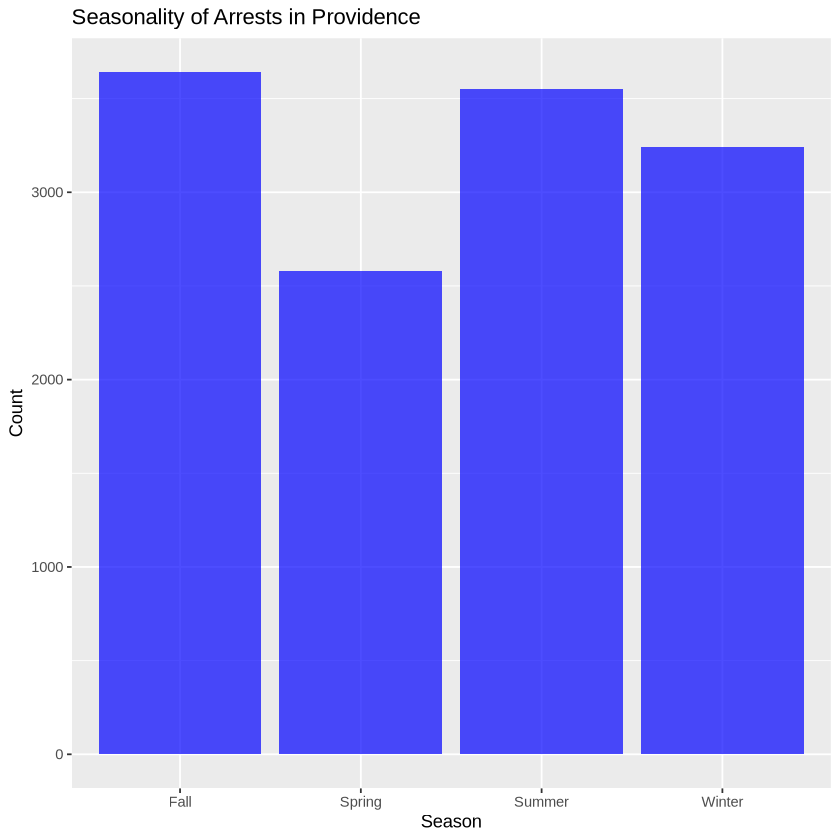

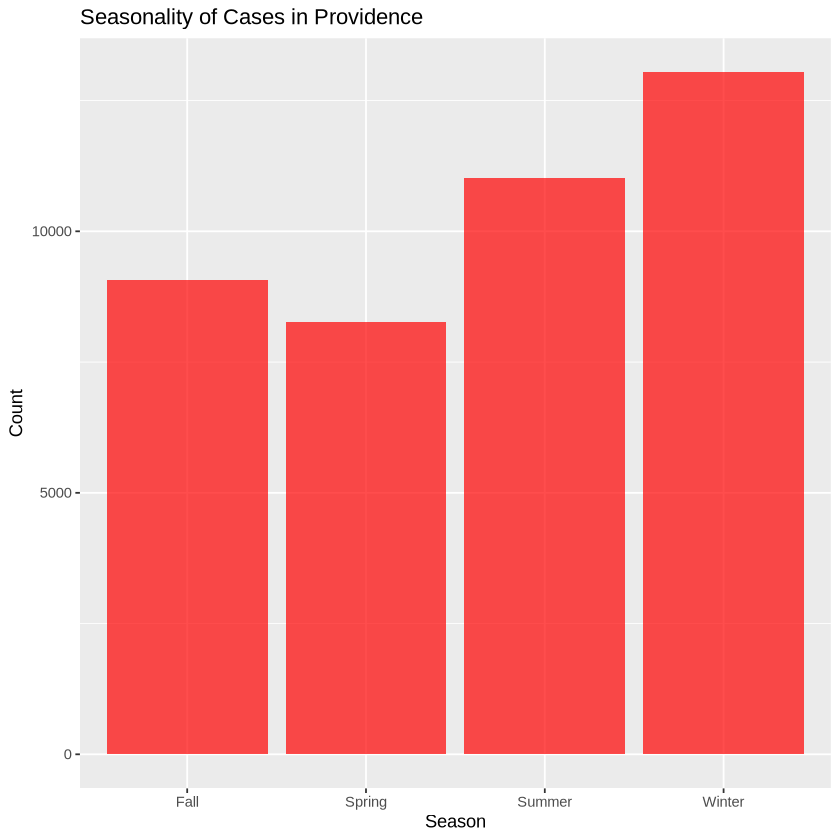

In [128]:
# Arrests Plot 
arrests_plot <- ggplot(seasonality_df, aes(x = Season, y = Arrests)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(title = "Seasonality of Arrests in Providence",
       x = "Season",
       y = "Count")

# Cases plot
cases_plot <- ggplot(seasonality_df, aes(x = Season, y = Cases)) +
  geom_bar(stat = "identity", fill = "red", alpha = 0.7) +
  labs(title = "Seasonality of Cases in Providence",
       x = "Season",
       y = "Count")

print(arrests_plot) 
print(cases_plot)

The data suggests a relationship between seasonality and crime in Providence, with cases showing a pronounced increase in Summer and Winter, while arrests are relatively stable but slightly higher in Winter and Summer. 

This indicates that crime rates, as represented by cases and arrests, are influenced by seasonal factors, such as weather and social behaviors. The stronger seasonality in cases compared to arrests may reflect differences in reporting or law enforcement activity. Overall, the findings support the hypothesis that crime varies by season.

## **Chi-Squared Test** 
Two test relationship between season and crime in providence I will use the Chi-Square Test. The Chi-square test is used to determine whether there is a significant relationship between two categorical variables: the seasons and the counts of arrests and cases.

In [134]:
# Aggregate arrests by season
arrest_counts <- table(arrests_df$season)

# Aggregate cases by season
case_counts <- table(cases_df$season)

# Combine into a contingency table
contingency_table <- rbind(arrest_counts, case_counts)

print(contingency_table)

               Fall Spring Summer Winter
arrest_counts  3240   2582   3550   3640
case_counts   13039   8259  11013   9073


In [136]:
# Perform the Chi-square test
chi_test_result <- chisq.test(contingency_table)
print(chi_test_result)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 301.19, df = 3, p-value < 2.2e-16



The Chi-square test results indicate a highly significant relationship between seasonality and crime in Providence. The extremely small p-value (almost zero) suggests that the observed seasonal variations in arrests and cases are unlikely to be due to chance, supporting the hypothesis that crime rates are influenced by seasonal factors.

# **Conclusion**
Based on the visualizations and the Chi-square test, we can conclude that there is a significant relationship between seasonality and crime in Providence. The visualizations show clear seasonal patterns, with arrests slightly higher in Winter and Summer and cases peaking in Winter and Summer while being lowest in Spring. The Chi-square test confirms this relationship statistically, with a highly significant p-value, indicating that the observed seasonal differences in arrests and cases are not due to random chance. Together, these findings support the hypothesis that crime rates are influenced by seasonal factors.

## 3. Crime rate drops during the pandemic

A study published in Nature Human Behaviour found that urban crime fell by over a third around the world during COVID-19 shutdowns. [(Nivette et al. 2021)](https://www.nature.com/articles/s41562-021-01139-z) [(press publication)](https://www.cam.ac.uk/stories/COVIDcrime). Making the same assumption with our data again, assess whether crime fell in Providence during COVID-19 shutdowns.

Note: you cannot simply count up the number of arrests or cases for each year and compare between years! If you are wondering why, check the time range of your data.

# Thought Process
To assess whether crime fell during the COVID-19 shutdowns in Providence, we will:

1. Focus on specific time periods: Pre-COVID (before March 2020) and COVID (March 2020 onward).
2. Normalize the data by adjusting for the number of days in each time period to account for unequal durations.
3. Compare the average daily crime rates (arrests and cases) during these periods.
4. Use a statistical test (e.g., t-test) to determine if the observed differences are significant.

## First, Preparing the Data
I will filter the data into two periods (pre-COVID and during COVID) and calculate the daily crime rates for each period.

In [149]:
# Define COVID cutoff date (March 2020) since that is when Covid (pandemic) started 
covid_start_date <- as.Date("2020-03-01")

In [150]:
# Split data into pre-COVID and COVID periods for both cases and arrests 
arrests_pre_covid <- arrests_df %>% filter(arrest_date < covid_start_date)
arrests_covid <- arrests_df %>% filter(arrest_date >= covid_start_date)

cases_pre_covid <- cases_df %>% filter(reported_date < covid_start_date)
cases_covid <- cases_df %>% filter(reported_date >= covid_start_date)

In [159]:
# Calculate the total number of days in each period
#he difftime() function in R calculates the difference between two date or time values and returns the result as a time difference object. This function is particularly useful for determining the duration between dates or times in various units.
pre_covid_days <- as.numeric(difftime(covid_start_date, min(arrests_df$arrest_date)))
covid_days <- as.numeric(difftime(max(arrests_df$arrest_date), covid_start_date))

# Calculate average daily crime rates
arrests_rate_pre_covid <- nrow(arrests_pre_covid) / pre_covid_days
arrests_rate_covid <- nrow(arrests_covid) / covid_days

cases_rate_pre_covid <- nrow(cases_pre_covid) / pre_covid_days
cases_rate_covid <- nrow(cases_covid) / covid_days

In [161]:
arrests_rate_pre_covid 
arrests_rate_covid 

[1] 24.11715

[1] 12.51813

The average daily arrest rate in Providence decreased significantly during the COVID-19 period. Before the pandemic, the rate was 24.12 arrests per day, but during COVID-19, it dropped to 12.52 arrests per day. This represents a substantial decline, highlighting the impact of pandemic-related restrictions on crime and law enforcement activities.

In [162]:
cases_rate_pre_covid 
cases_rate_covid 

[1] 59.72385

[1] 46.82211

The average daily case rate in Providence decreased during the COVID-19 period. Before the pandemic, the rate was 59.72 cases per day, while during COVID-19, it dropped to 46.82 cases per day. This represents a moderate decline, indicating fewer cases were reported daily during the pandemic compared to the pre-COVID period.

## **Visualization**

In [164]:
# Combine into a data frame for visualization
crime_rates <- data.frame(
  Period = c("Pre-COVID", "COVID"),
  Arrests = c(arrests_rate_pre_covid, arrests_rate_covid),
  Cases = c(cases_rate_pre_covid, cases_rate_covid)
)
print(crime_rates)

     Period  Arrests    Cases
1 Pre-COVID 24.11715 59.72385
2     COVID 12.51813 46.82211


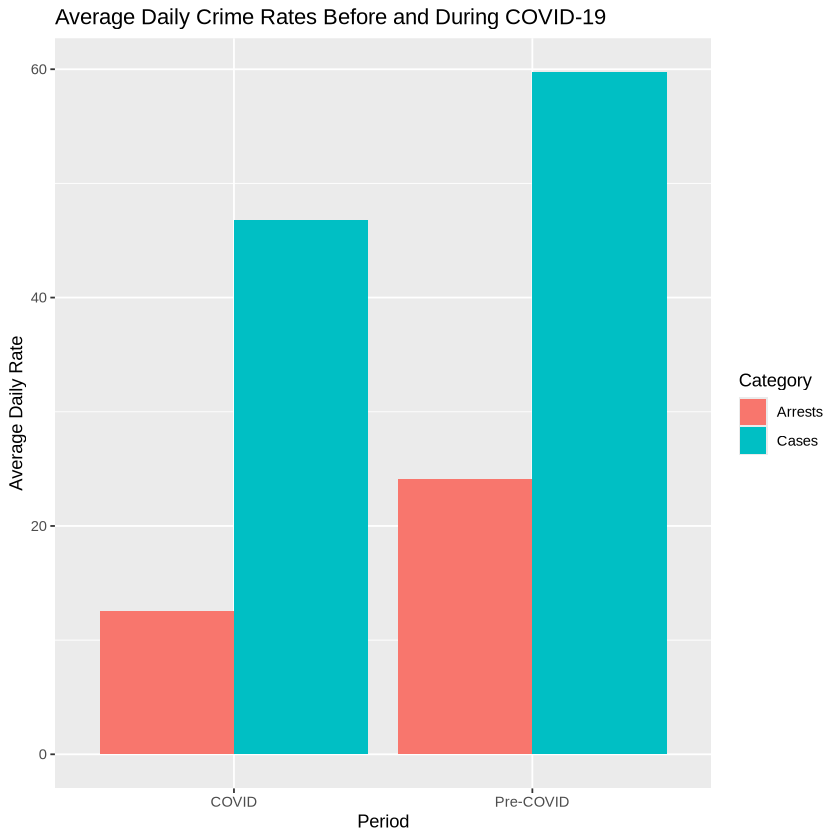

In [167]:
# Reshape the data to long format
crime_rates_long <- pivot_longer(crime_rates, cols = c("Arrests", "Cases"), names_to = "Category", values_to = "Rate")

# Create the bar chart
ggplot(crime_rates_long, aes(x = Period, y = Rate, fill = Category)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Daily Crime Rates Before and During COVID-19",
       x = "Period",
       y = "Average Daily Rate")

The bar chart illustrates the average daily crime rates for arrests and cases in Providence before and during the COVID-19 pandemic. It shows that both categories experienced a decline during the pandemic. The average daily arrest rate dropped significantly, nearly halving from the pre-COVID period to the COVID period. Similarly, the average daily case rate decreased, though the reduction was less pronounced compared to arrests. The chart highlights a clear distinction between the two periods, suggesting a general reduction in crime-related activities during the pandemic.

## Statistical Test
Use a two-sample t-test to assess whether the average daily crime rates differ significantly between the pre-COVID and COVID periods.

The t-test compares the average daily crime rates (numeric data) between two periods: pre-COVID and COVID. The goal is to determine whether the observed differences in crime rates are statistically significant or could have occurred by chance. By calculating daily counts for arrests and cases, we ensure the data is numeric and represents the distribution of crime rates.

In [172]:
# Calculate daily crime rates for arrests
arrests_daily_pre_covid <- arrests_pre_covid %>%
  group_by(arrest_date) %>%
  summarize(daily_count = n())

arrests_daily_covid <- arrests_covid %>%
  group_by(arrest_date) %>%
  summarize(daily_count = n())

# Calculate daily crime rates for cases
cases_daily_pre_covid <- cases_pre_covid %>%
  group_by(reported_date) %>%
  summarize(daily_count = n())

cases_daily_covid <- cases_covid %>%
  group_by(reported_date) %>%
  summarize(daily_count = n())


In [173]:
# Perform t-tests for arrests
arrests_t_test <- t.test(arrests_daily_pre_covid$daily_count, arrests_daily_covid$daily_count)

# Perform t-tests for cases
cases_t_test <- t.test(cases_daily_pre_covid$daily_count, cases_daily_covid$daily_count)

# Print the results
print(arrests_t_test)
print(cases_t_test)



	Welch Two Sample t-test

data:  arrests_daily_pre_covid$daily_count and arrests_daily_covid$daily_count
t = 15.12, df = 316.93, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.08970 13.10834
sample estimates:
mean of x mean of y 
 24.11715  12.51813 


	Welch Two Sample t-test

data:  cases_daily_pre_covid$daily_count and cases_daily_covid$daily_count
t = 20.232, df = 331.16, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 20.30558 24.67938
sample estimates:
mean of x mean of y 
 69.97059  47.47811 



The average daily arrest rate dropped from 24.12 24.12 arrests per day before the pandemic to 12.52 12.52 arrests per day during the pandemic. The 95% confidence interval ( 10.09 , 13.11 10.09,13.11) confirms a meaningful reduction in arrests, reflecting a substantial impact of the pandemic on law enforcement activities and crime levels.

The average daily case rate fell from 69.97 69.97 cases per day to 47.48 47.48 cases per day. The 95% confidence interval ( 20.31 , 24.68 20.31,24.68) confirms this decrease, highlighting a notable reduction in reported cases during the pandemic, likely influenced by reduced activity levels and possible reporting delays.

# **Conclusion**
Crime rates in Providence have been notably lower during the COVID-19 pandemic, as supported by both visual analysis and statistical tests. The bar chart shows significant reductions in arrests and reported cases during the pandemic as compared to pre-COVID. 

Statistical tests using Welch Two Sample t-tests corroborate these observations, showing that the differences in daily averages are significant for both categories of events. The number of arrests fell from a mean of 24.12 per day before COVID to 12.52 per day during COVID, and cases dropped from a mean of 69.97 per day to 47.48 per day. This finding suggests that the pandemic had a strong effect on crime, potentially through restrictions to movement and social interactions and changes in how law enforcement was carried out.

## 4. Outlier data

In our data, December 2019 and January 2020 seem to have an unusually high number of arrests without a corresponding spike in cases. Is there actually a significant difference between arrests in that time period and other time periods? Explore the data and come up with some hypotheses around the spike.

## Thought Process:
1. Define Time Periods: Compare the arrests in December 2019 and January 2020 (outlier period) with the rest of the data.
2. Statistical Approach:Calculate daily arrest rates for the outlier period and the rest of the data. Use a statistical test (e.g., t-test) to assess whether the difference in daily arrest rates is significant.
3. Exploratory Visualization:Create a bar plot comparing daily arrest rates in the outlier period and other periods.

Hypothesis:
* Null Hypothesis (H₀): There is no significant difference in daily arrest rates between the outlier period and other time periods.
* Alternative Hypothesis (H₁): The daily arrest rates in the outlier period are significantly different from those in other time periods.


### Filter and group the data to calculate daily arrest rates.

In [177]:
# Filter data for December 2019 and January 2020
outlier_period <- arrests_df %>%
  filter(arrest_date >= as.Date("2019-12-01") & arrest_date <= as.Date("2020-01-31"))

# Filter data for all other periods
other_period <- arrests_df %>%
  filter(arrest_date < as.Date("2019-12-01") | arrest_date > as.Date("2020-01-31"))

# Calculate daily arrest rates for each period
outlier_daily <- outlier_period %>%
  group_by(arrest_date) %>%
  summarize(daily_count = n())

other_daily <- other_period %>%
  group_by(arrest_date) %>%
  summarize(daily_count = n())


## **Statistical Test**
Use a t-test to compare daily arrest rates.

In [179]:
t_test_result <- t.test(outlier_daily$daily_count, other_daily$daily_count)

# Print the results
print(t_test_result)


	Welch Two Sample t-test

data:  outlier_daily$daily_count and other_daily$daily_count
t = 10.328, df = 63.726, p-value = 3.067e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15.70513 23.23889
sample estimates:
mean of x mean of y 
 33.90323  14.43122 



The extremely small p-value (< 0.05) strongly suggests that the daily arrest rates during the outlier period are significantly higher compared to other periods. This result confirms that the spike in arrests during December 2019 and January 2020 is not due to random variation and warrants further investigation into potential causes. Let me know if you'd like to explore hypotheses or visualize the data! ​

## **Visualization**
Create a bar chart comparing the daily arrest rates.

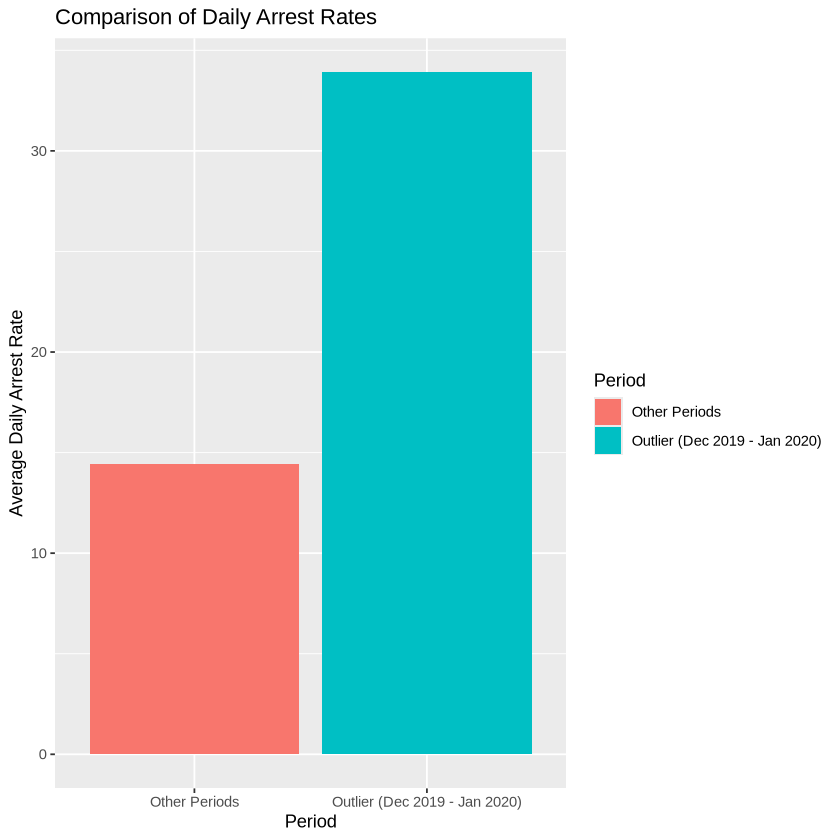

In [180]:
# Combine data for visualization
outlier_daily$Period <- "Outlier (Dec 2019 - Jan 2020)"
other_daily$Period <- "Other Periods"
combined_data <- rbind(outlier_daily, other_daily)

# Create the bar chart
ggplot(combined_data, aes(x = Period, y = daily_count, fill = Period)) +
  geom_bar(stat = "summary", fun = "mean", position = "dodge") +
  labs(title = "Comparison of Daily Arrest Rates",
       x = "Period",
       y = "Average Daily Arrest Rate") 

The chart highlights a significant spike in daily arrest rates during December 2019 and January 2020 compared to other periods. This confirms the outlier nature of this time frame and suggests the need for further investigation into potential causes, such as increased enforcement, specific incidents, or seasonal effects.

# **Conclusion** 
The analysis for Question 4 concludes that there is a statistically significant and visually apparent spike in daily arrest rates during the outlier period (December 2019 - January 2020) compared to other time periods. The statistical test (t-test) confirms that the difference is highly significant ( 𝑝 < 0.05), and the visualizations illustrate that the average daily arrest rate during the outlier period exceeds 30 arrests per day, compared to approximately 10 arrests per day in other periods. This significant increase suggests that December 2019 and January 2020 are outliers, potentially caused by factors such as increased law enforcement activity, specific policies, seasonal effects like holiday-related incidents, or data anomalies. Further investigation into the specific events or policies during this period is recommended to understand the root cause of the spike.

## 5. Coming up with your own question

Come up with your own question with regards to the data, and answer it with a statistical test and visualization based on what we have learned so far. What followup questions does your answer generate?

# **Is there a significant difference in the number of arrests between weekdays and weekends in the dataset?**

Hypothesis:

* Null Hypothesis (H0): There is no significant difference in the number of arrests between weekdays and weekends.
* Alternative Hypothesis (H1): There is a significant difference in the number of arrests between weekdays and weekends.

## First, Data Preparation 
Categorize the arrest dates as weekdays or weekends and calculate the normalized arrest rates.

In [184]:
# Add a 'day_type' column for Weekday/Weekend classification
arrests_df <- arrests_df %>%
  mutate(day_type = ifelse(wday(arrest_date) %in% c(1, 7), "Weekend", "Weekday"))

# Count the number of unique weekdays and weekends
weekday_days <- arrests_df %>%
  filter(day_type == "Weekday") %>%
  distinct(arrest_date) %>%
  nrow()

weekend_days <- arrests_df %>%
  filter(day_type == "Weekend") %>%
  distinct(arrest_date) %>%
  nrow()

# Calculate total arrests for weekdays and weekends
weekday_total <- arrests_df %>%
  filter(day_type == "Weekday") %>%
  nrow()

weekend_total <- arrests_df %>%
  filter(day_type == "Weekend") %>%
  nrow()

# Normalize arrest rates by dividing total arrests by the number of days
weekday_rate <- weekday_total / weekday_days
weekend_rate <- weekend_total / weekend_days

## Statistical Test
Perform a t-test on daily arrest counts for weekdays and weekends.

In [186]:
# Calculate daily counts for weekdays and weekends
weekday_counts <- arrests_df %>%
  filter(day_type == "Weekday") %>%
  group_by(arrest_date) %>%
  summarize(daily_count = n()) %>%
  pull(daily_count)

weekend_counts <- arrests_df %>%
  filter(day_type == "Weekend") %>%
  group_by(arrest_date) %>%
  summarize(daily_count = n()) %>%
  pull(daily_count)

# Perform the t-test
t_test_result <- t.test(weekday_counts, weekend_counts)

# Print the results
print(t_test_result)



	Welch Two Sample t-test

data:  weekday_counts and weekend_counts
t = -0.36352, df = 418.62, p-value = 0.7164
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.792631  1.233066
sample estimates:
mean of x mean of y 
 15.82705  16.10684 



There is no significant difference in the number of arrests between weekdays and weekends in this dataset. This suggests that arrests are distributed relatively evenly across the week without noticeable spikes on weekends or weekdays.

## Visualization 
Create a bar plot comparing normalized arrest rates for weekdays and weekends.

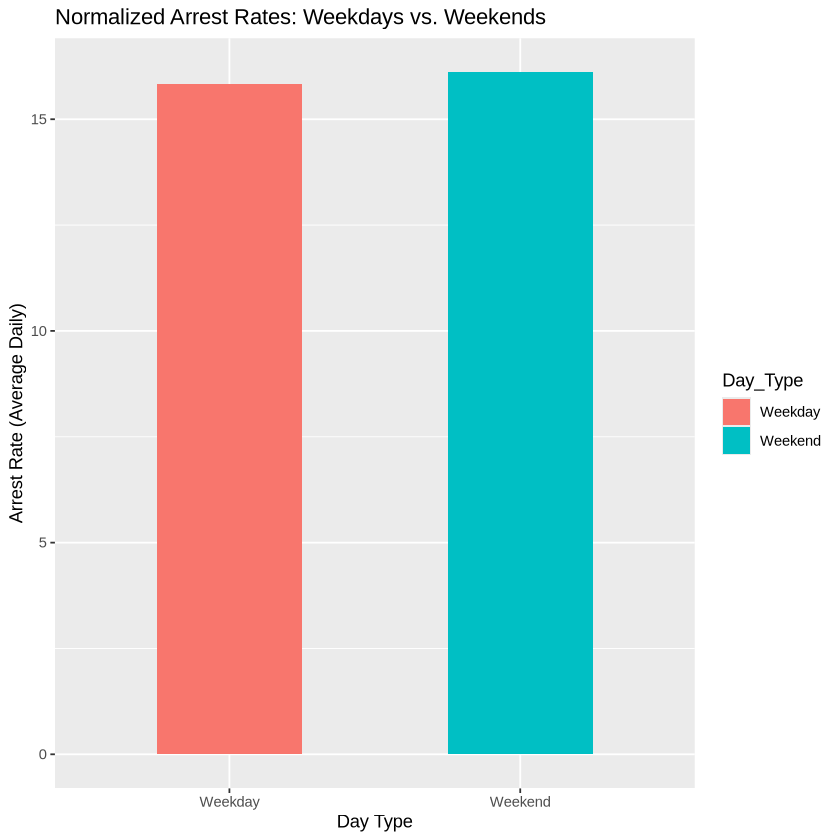

In [187]:
# Create a data frame for visualization
rates_df <- data.frame(
  Day_Type = c("Weekday", "Weekend"),
  Arrest_Rate = c(weekday_rate, weekend_rate)
)

# Create the bar plot
ggplot(rates_df, aes(x = Day_Type, y = Arrest_Rate, fill = Day_Type)) +
  geom_bar(stat = "identity", width = 0.5) +
  labs(title = "Normalized Arrest Rates: Weekdays vs. Weekends",
       x = "Day Type",
       y = "Arrest Rate (Average Daily)") 

# **Conclusion** 
This analysis shows there is no statistically significant difference between weekdays and weekends' averages for the amount of arrests. The Welch Two Sample t-test yielded a p-value of (0.7164), well above the conventional threshold of (0.05) for significance, which implies that the mean arrests per day on weekdays (15.83) and weekends (16.11) are meaningfully correct. The confidence interval (-1.79, 1.23), which contains zero, gives us the necessary assurance that any observed differences are due to random variation and not a true difference.

The bar chart that shows normalized weekday and weekend arrest rates provides visual support for this conclusion. In fact, the average number of arrests per day for both time periods is almost the same; neither category seems to have any glaring spikes or differences. This uniformity implies that arrests occur evenly distributed across the week, with no particular day (weekday or weekend) contributing significantly more activity.

The statistical test and visualization are consistent in confirming that the arrests for this dataset are evenly distributed across weekdays and weekends. This result suggests that the day of the week does not affect arrest counts according to this data.

## Extra credit 1 (5 pts)

There is a lot of missing data in the `cases` and `arrests` dataframes. Often a question that comes up with missing data is whether it is missing at random or systematically. ([Little 1986](https://www.tandfonline.com/doi/abs/10.1080/01621459.1988.10478722)) describes a statistical test to test for whether data is missing completely at random or not. Apply the test to our data and provide your assessment of whether the data is missing or not.

## Extra credit 2 (5 pts)

Although we use our data to answer the questions above, it is almost certainly not the best source of data to use, just what we have available to us through public records. The field of criminology and how to define crime additionally has [fraught history](https://www.bu.edu/bulawreview/files/2020/05/02-SIMON.pdf) and [modern controversies](https://www.theguardian.com/us-news/2021/nov/07/lapd-predictive-policing-surveillance-reform) rooted in structural and political issues. What are some of the potential problems with our data for answering these questions besides missingness? What are assumptions made and potential issues with some of the questions asked in this homework?